In [186]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

row=6
column=2
num=1

def main():
    img_path1 ='/home/apd/code/CSE_Lab/CSE_4_1_DIP/DIP/Image/image32.jpg'
    img=cv2.imread(img_path1);

    plt.figure(figsize=(20,12))
    
    show(img,"original image")

    #Adding noise in the image 
    noise_img=gaussian_noise(img,0,10)

    # Define average filter (3x3)
    k = 3
    average_kernel = np.ones((k, k), np.float32) / (k * k)


    prewitt_x=np.array([[-1,0,1],
                      [-2,0,2],
                      [-1,0,1]],dtype=np.float32)
    prewitt_y=np.array([[-1,-2,-1],
                      [0,0,0],
                      [1,2,1]],dtype=np.float32)
    

    sobel_x=np.array([[-1,0,1],
                      [-2,0,2],
                      [-1,0,1]],dtype=np.float32)
    sobel_y=np.array([[-1,-2,-1],
                      [0,0,0],
                      [1,2,1]],dtype=np.float32)
    

    scharr_x=np.array(  [[-3,0,3],
                        [-10,0,10],
                        [-3,0,3]], dtype=np.float32)
    scharr_y=np.array(  [[-3,-10,-3],
                        [0,0,0],
                        [3,10,3]], dtype=np.float32)

    laplacian=np.array([[0,-1,0],
                        [-1,4,-1],
                        [0,-1,0]],dtype=np.float32)
    
    own_kernel_x=np.array([[1,-1,1],
                        [2,-2,2],
                        [3,-2,3]],dtype=np.float32)
    
    own_kernel_y=np.array([[1,2,3],
                        [-1,-2,-3],
                        [1,2,3]],dtype=np.float32)
    

    img_filter(noise_img,average_kernel,"Average")
    
    img_filter(noise_img,prewitt_x,"prewitt_x")
    img_filter(noise_img,prewitt_y,"prewitt_y")

    img_filter(noise_img,sobel_x,"sobel_x")
    img_filter(noise_img,sobel_y,"sobel_y")

    img_filter(noise_img,scharr_x,"scharr_x")
    img_filter(noise_img,scharr_y,"scharr_y")

    img_filter(noise_img,laplacian,"laplacian")   

    img_filter(noise_img,own_kernel_x,"own_kernel_x")
    img_filter(noise_img,own_kernel_y,"own_kernel_y")

    

    
    plt.tight_layout()
    plt.show()


In [187]:
def show(img,title):
    global num
    plt.subplot(row,column,num)
    plt.title(title)
    plt.imshow(img,cmap="gray")
    plt.grid(False)
    num +=1

In [188]:
def gaussian_noise(img,mean,sigma):
    # mean:The center of the Gaussian distribution.
    # sigma:Standard deviation, which controls the width of the Gaussian distribution.
    # sigma:Controls the spread (variation) of the noise values
    noise=np.random.normal(mean,sigma,img.shape)
    noise_img = np.clip(img + noise, 0, 255).astype(np.uint8)
    
    show(noise_img,"Noise Image")
    return noise_img

In [189]:
def img_filter(img,kernel,title):

# User-defined 2D convolution (equivalent to cv2.filter2D)

    h,w,c= img.shape
    kh,kw = kernel.shape
    pad_h,pad_w=kh//2,kw//2

    # Pad the image
    padded= np.pad(img,((pad_h,pad_h),(pad_w,pad_w),(0, 0)),mode='constant')

    # Output image
    # output=img.copy()
    # or
    output = np.zeros_like(img,dtype=np.float32)

    # Convolution
    for i in range(h):
        for j in range(w):
            for ch in range(c):
                    region = padded[i:i+kh, j:j+kw, ch]
                    output[i, j, ch] = np.sum(region * kernel)

    # Clip to valid pixel range [0,255]
    output=np.clip(output, 0, 255).astype(np.uint8)
    show(output,title)




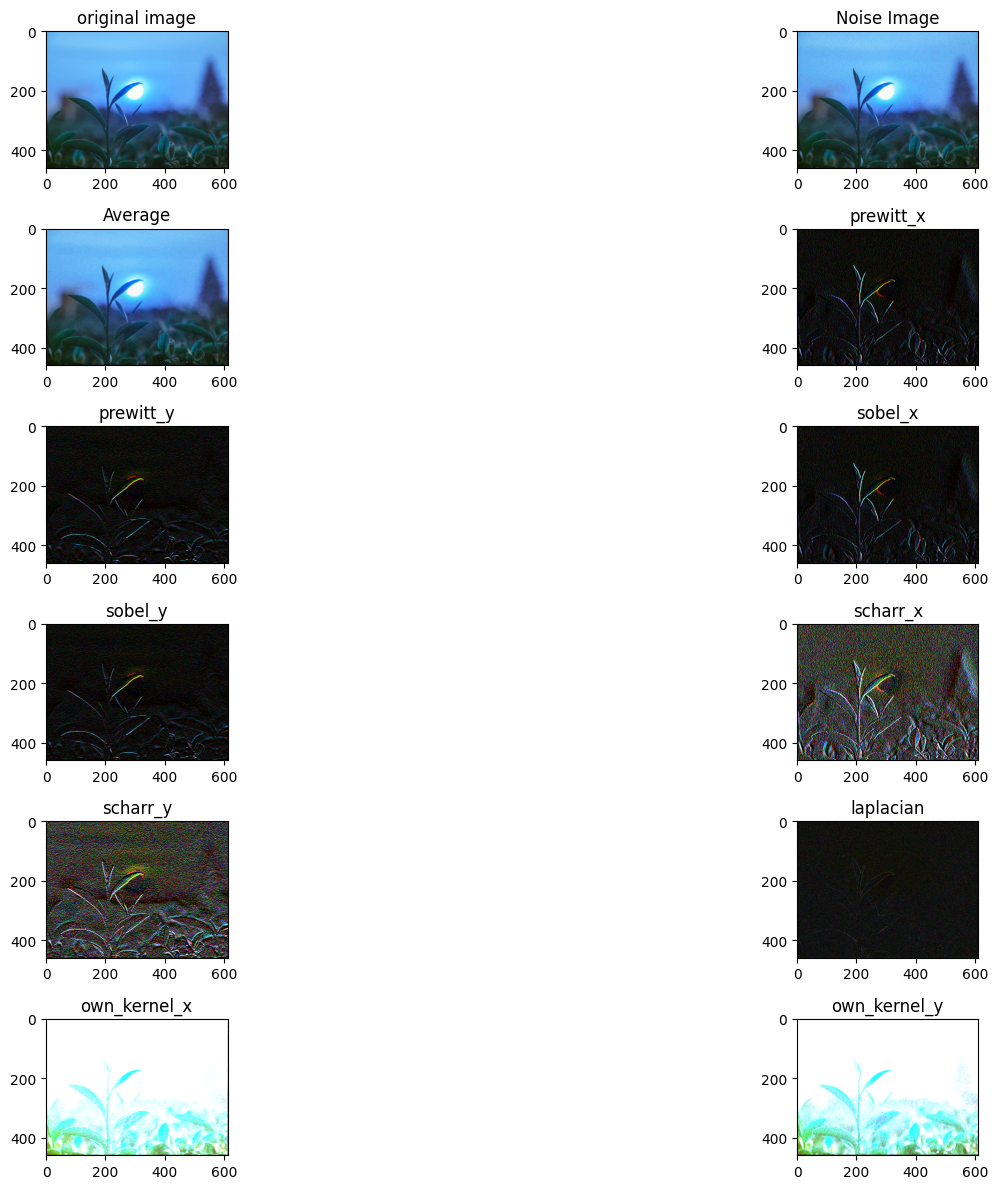

In [190]:

if __name__=='__main__':
    main()